### Neccessary imports

In [1]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from imblearn.over_sampling import SMOTE
from collections import Counter
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#import the data
df = pd.read_csv('data/water_potability.csv')
#view the first first rows of the data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Exploratory Data Analysis

In [3]:
#check the rows and columns of the data
df.shape

(3276, 10)

In [4]:
#deep copy of the original dataframe
df_temp = df.copy()

In [5]:
#check the information about the data features
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
#check the statistical view of the data, in order to detect outliers
df_temp.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
#correlation among the features
corr = df_temp.corr()

#view the corr
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


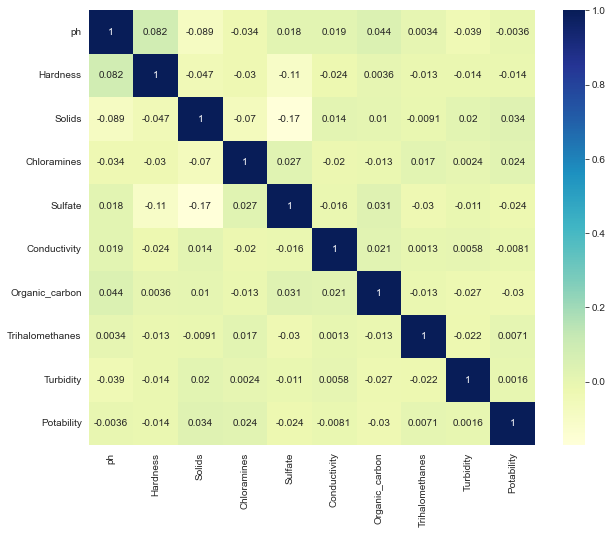

In [8]:
#better visualization with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           annot=True,
           fmt='.2g',
           cmap='YlGnBu')
plt.show()

In [9]:
#percentage of the target labels
df_temp['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [10]:
#check the unique entries of the target variable
df_temp.Potability.unique()

array([0, 1], dtype=int64)

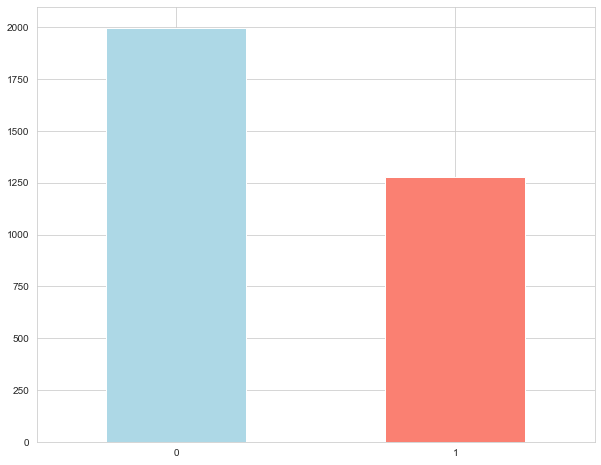

In [11]:
#bar chart showing the distribution of counts of potable water to not potable water
df_temp['Potability'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'], figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

In [12]:
#check for missing values
df_temp.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Data Pre-processing

In [13]:
#fill in the missing values using the median for each features
df_temp['ph'].fillna(df_temp['ph'].median(), inplace=True)
df_temp['Sulfate'].fillna(df_temp['Sulfate'].median(), inplace=True)
df_temp['Trihalomethanes'].fillna(df_temp['Trihalomethanes'].median(), inplace=True)

In [14]:
df_temp.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

From the exploratory data analysis above, we can say that the dataset is normally distributed dataset across all features, also there are no categorical features, and the missing features has been filled. Now, we can proceed to model building.

In [15]:
#view the data 
df_temp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
#view the target distribution
df_temp['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

From the above visualization, we can see an imbalanced distribution of the dataset which can in turn cause bias in our machine learning model. Let's use SMOTE techniques to make it a balanced dataset

In [17]:
#split the dataset into features and labels
X = df_temp.iloc[:, :-1]
y = df_temp.iloc[:,-1]

In [18]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [20]:
counter = Counter(y)
print(counter)

Counter({0: 1998, 1: 1278})


In [21]:
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
counter_oversample = Counter(y)
print(counter_oversample)

Counter({0: 1998, 1: 1998})


From the above code, we can see that the class distribution is balanced.

In [22]:
#split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train[:10]

array([[-1.65241996, -0.32007982,  1.27050442,  1.10030307,  1.02547294,
        -1.63714874,  0.16304319, -1.14766182, -0.36318774],
       [-0.02321714,  0.17425506, -0.69457426, -1.09619665,  0.20811576,
        -0.91266889,  0.22345789, -0.38791254, -1.78509704],
       [-0.03296467, -0.45111241, -0.52169434, -0.2039398 , -0.0137082 ,
         0.86255108, -0.84696111,  1.28310344, -0.53641627],
       [ 0.05799587,  0.23584119, -1.1877131 , -1.55850418,  0.48875083,
        -0.32751276, -1.00360907,  0.97951009,  0.40303495],
       [-0.87813489, -0.06086355, -0.48767972, -0.95722113,  2.15140168,
         2.4671314 ,  1.05385026,  1.75132583,  0.3490607 ],
       [-1.44045372, -0.5258823 ,  0.06325557,  1.92472337, -1.04039727,
         0.29327099, -0.01494634,  1.03635533, -0.84915437],
       [-0.03296467, -1.27501636,  3.42455268, -2.93394666,  0.88296595,
        -1.30934798, -0.03035491, -1.16046559, -2.60992487],
       [-0.03296467, -1.13722585,  0.51943599,  0.03523445, -0

### Model Building

In [24]:
model = Sequential()
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size=32, epochs=120)
history

Epoch 1/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.6896
Epoch 2/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.6821
Epoch 3/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.6855
Epoch 4/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.6824
Epoch 5/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6834
Epoch 6/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.6834
Epoch 7/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.6837
Epoch 8/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6852
Epoch 9/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6837
Epoch 10/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5805 - accura

100/100 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6868
Epoch 82/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.6880
Epoch 83/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6909
Epoch 84/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.6865
Epoch 85/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.6884
Epoch 86/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.6931
Epoch 87/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6877
Epoch 88/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6902
Epoch 89/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6868
Epoch 90/120
100/100 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 

### Evaluation and Results

In [28]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

25/25 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

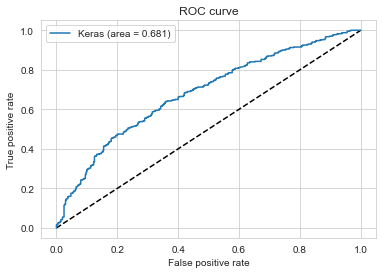

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig("roc.png", bbox_inches="tight", format="png")

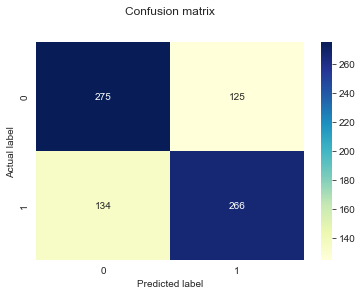

In [49]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("conmat.png", bbox_inches="tight", format="png")

In [35]:
loss = history.history["loss"]
acc = history.history["accuracy"]

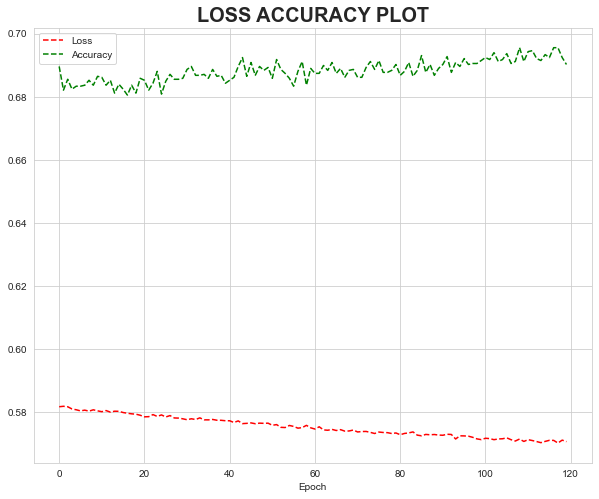

In [36]:
plt.figure(figsize=(10,8))
plt.plot(loss, "r--", label="Loss")
plt.plot(acc, "g--", label="Accuracy")
plt.title("loss accuracy plot".upper(), size=20, weight="bold")
plt.xlabel("Epoch")
plt.legend();
plt.savefig("loss accuracy plot.png", bbox_inches="tight", format="png")

In [37]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
accuracy = RFC.score(X_test, y_test)

In [38]:
models = {'ANN': history.history['accuracy'][-1],
         'RFC' : accuracy}

In [39]:
models

{'ANN': 0.690237820148468, 'RFC': 0.67625}

In [40]:
table = pd.DataFrame(models,
            index=['Accuracy_score'])

In [41]:
table

,ANN,RFC
Accuracy_score,0.690238,0.67625


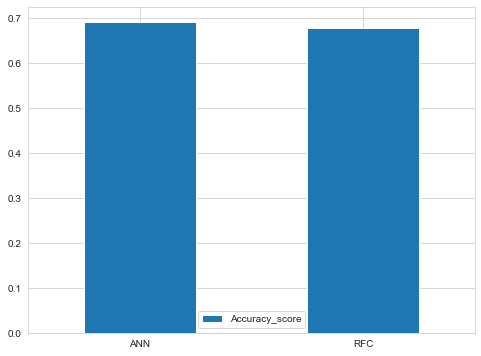

<Figure size 432x288 with 0 Axes>

In [42]:
table.T.plot(kind='bar', figsize=(8,6))
plt.xticks(rotation=0)
plt.show()
plt.savefig("Accuracy scores of the models", bbox_inches="tight", format="png")

### Saving model for deployment

In [43]:
import pickle
with open('ANN_model.pkl', 'wb') as f:
    model = pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://49738bfd-a0c1-431c-8aab-1974347c7f3e/assets


In [44]:
with open('water_model.pkl', 'wb') as f:
    model = pickle.dump(RFC, f)

In [45]:
with open('water_model.pkl', 'rb') as f:
    model = pickle.load(f)
print(model)

RandomForestClassifier()


Prediction

In [46]:
model.predict([[8.232,130.1232,2079.67893, 1887.90,7.123, 355.8979, 558.322, 10.342, 88.7829]])

array([0], dtype=int64)

From the above code, when we entered the following values for each feature variables. We can see that these values are unseen data and our model predicted that the water is potable or suitable for consumption.

### Conclusion

The investigation of methods for identifying drinking water has a high relevance in the actuality beacuse the WHO has said that in 2025, half of the world population are going to live in lack of water.

The comparative analysis of ANN and Random Forest classifier developed in this notebook, doesn't have the best performance,I got less tha 70% in AUC in the ROC Curve, this because some factors: the small dataset, the quality and amount of explanatory variables we have, the diference between the number of rows that represent potable and non-potable water. However, the behavior of the loss function is really good. In this notebook we used a 0.5 treshold for the clasification, but in the real life we need to consult an expert for better results, this can save or damage people.